In [1]:
from datetime import datetime
import os
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from scipy import sparse
from scipy.sparse import csc_matrix
from sklearn.decomposition import TruncatedSVD


## Load Dataset
### Spotify   Dataset

Description of dataset https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

In [2]:
df = pd.read_csv("SpotifyFeatures.csv")


In [3]:
df.head(1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.91,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814


## We are going to check for all the analysis with the target as 'popularity'

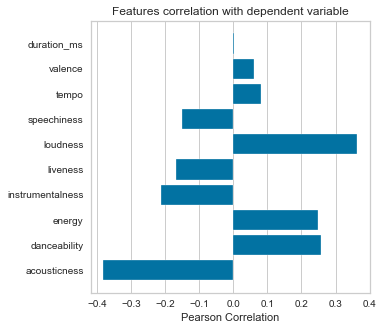

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [4]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(5,5)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

### Observations:
- Popularity column could be used to filter out few data. 
- Genre columns seems to one important column for giving recommendation
- atrist_name could be useful as many user choose to listen songs of there favourite artists.
- we have multiple columns which contain continuous values 

### First remove rows based on popularity information

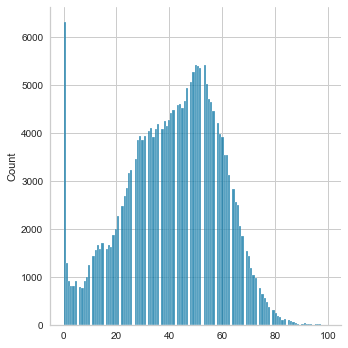

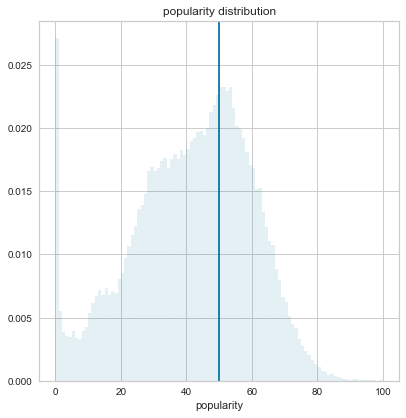

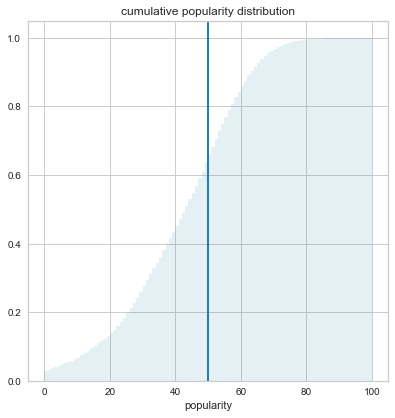

In [6]:

import scipy.stats as st

data = df.loc[:, 'popularity'].values

sns.displot(data=data)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.hist(
    data,
    alpha=0.1,
    bins=100,
    density=True
)

ax.axvline(x=50)
plt.xlabel('popularity')
plt.title('popularity distribution')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(
    data,
    alpha=0.1,
    bins=100,
    density=True,
    cumulative=True
)
ax.axvline(x=50)

plt.xlabel('popularity')
plt.title('cumulative popularity distribution')
plt.show()

In [7]:
df= df.query('popularity >= 50')
song_df=df
df.head(1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,0.0,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['genre'])
genre_val=encoder.transform(df['genre'])
df['new_genre'] =genre_val

In [11]:
encoder = LabelEncoder()
encoder.fit(df['key'])
keys=encoder.transform(df['key'])
df['new_key'] =keys



In [12]:
pd.set_option('display.max_columns', None)
df.head(1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,new_genre,new_key
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,0.0,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,17,5


### Analysing all columns with continuous values

#### Corelation with different columns with column "energy"

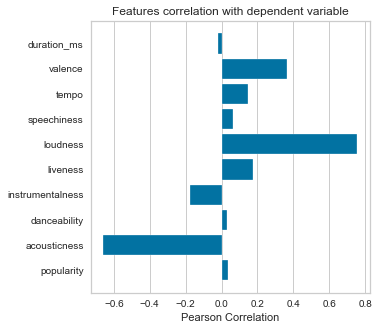

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [13]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['popularity','acousticness', 'danceability', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms']

X, y = df[feature_names], df[ 'energy']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(5,5)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

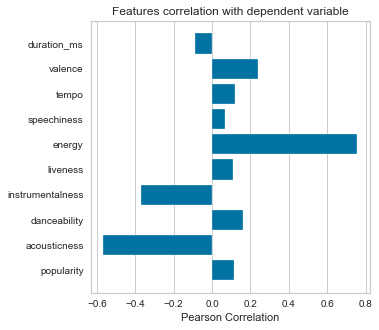

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [14]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['popularity','acousticness', 'danceability', 'instrumentalness',
       'liveness', 'energy', 'speechiness', 'tempo', 'valence','duration_ms']

X, y = df[feature_names], df[ 'loudness']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(5,5)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

#### Observations:
- From above we observe energy has very positive correlation  with loudness and negetive corelation with acousticness.
  So we will remove these columns 

### For all information we have from avove we can start applying machine learning algorithms for following:
- Try to find similar songs using continuous features.We can apply K-Means ,cosine similarities for this
- Find similar artists.This is helpful to recommend users.
- best songs from particulr genre.

## Task 1: Find similar songs

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [16]:
# df[['acousticness','danceability','duration_ms','energy',\
#     'instrumentalness','liveness','loudness','speechiness','tempo','valence']] =\
# scaler.fit_transform(df[['acousticness','danceability','duration_ms','energy',\
#     'instrumentalness','liveness','loudness','speechiness','tempo','valence']])

df[['new_genre','new_key','danceability','energy',\
    'instrumentalness','liveness','speechiness','tempo','valence']] =\
scaler.fit_transform(df[['new_genre','new_key','danceability','energy',\
    'instrumentalness','liveness','speechiness','tempo','valence']])



In [17]:
songs_df=df
songs_df.head(1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,new_genre,new_key
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.711805,246333,0.274961,-0.298401,D,0.81897,-5.922,Minor,0.298025,0.908694,4/4,0.939345,0.622953,-0.100943


In [18]:
# df_tmp=df[['acousticness','danceability','duration_ms','energy',\
#     'instrumentalness','liveness','loudness','speechiness','tempo','valence']]
# df_tmp.head()
df_tmp=df[['new_genre','new_key','danceability','duration_ms','energy',\
    'instrumentalness','liveness','speechiness','tempo','valence']]
df_tmp.head()

,new_genre,new_key,danceability,duration_ms,energy,instrumentalness,liveness,speechiness,tempo,valence
135,0.622953,-0.100943,0.711805,246333,0.274961,-0.298401,0.818970,0.298025,0.908694,0.939345
136,0.622953,-0.678810,0.462112,186467,-0.112137,-0.298401,-0.563872,-0.561566,-0.878883,-0.659283
137,0.622953,0.765857,0.955096,199520,-0.553135,-0.298378,-0.481723,-0.070911,-1.542193,-1.682405
138,0.622953,-0.967743,-0.318979,240597,-1.307732,-0.284652,-0.608370,0.165925,-1.188704,1.263391
139,0.622953,-0.967743,0.257236,213947,-0.058237,-0.298401,-0.706949,-0.589873,-0.686034,-0.041435


### Find similar songs using continuous features.

#### Apply K-means
- We will use Elbow method to find value of hyperparameter K.

processing for k=1
processing for k=2
processing for k=3
processing for k=4
processing for k=5
processing for k=6
processing for k=7
processing for k=8
processing for k=9
processing for k=10
processing for k=11
processing for k=12
processing for k=13
processing for k=14
processing for k=15
processing for k=16
processing for k=17
processing for k=18
processing for k=19
processing for k=20
processing for k=21
processing for k=22
processing for k=23
processing for k=24
processing for k=25
processing for k=26
processing for k=27
processing for k=28
processing for k=29
processing for k=30


C:\Users\cseka\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


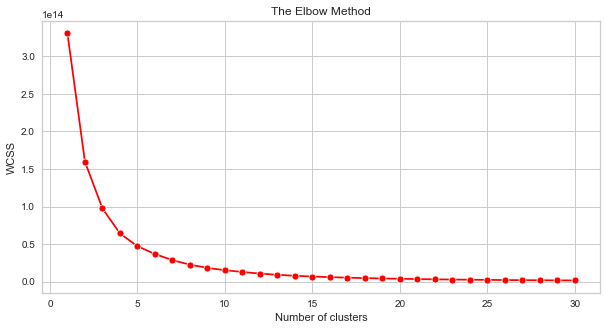

In [19]:

from sklearn.cluster import KMeans

num_clust = 30

wcss = []

for i in range(1, num_clust+1):
    print(f'processing for k={i}')
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_tmp)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))

sns.lineplot(range(1, num_clust+1), wcss,marker='o',color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Select k value as 20

C:\Users\cseka\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\cseka\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


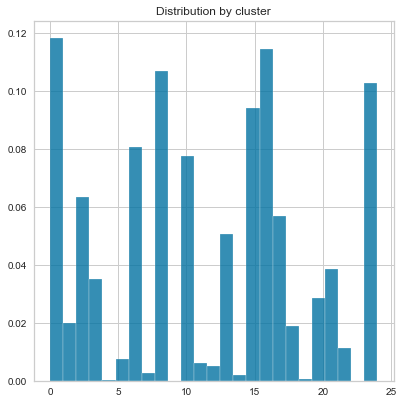

In [20]:
num_clust = 25

kmeans = KMeans(n_clusters = num_clust, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_tmp)

df_tmp.loc[:, 'cluster'] = y_kmeans

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(
    y_kmeans,
    bins=num_clust,
    density=True,
    alpha=0.8
)

plt.title('Distribution by cluster')
plt.show()

In [21]:
df_tmp.head(1)

,new_genre,new_key,danceability,duration_ms,energy,instrumentalness,liveness,speechiness,tempo,valence,cluster
135,0.622953,-0.100943,0.711805,246333,0.274961,-0.298401,0.81897,0.298025,0.908694,0.939345,15


In [22]:
df['cluster']=df_tmp['cluster']

#### Now lets find similarity of a song

In [23]:
songs_df=df[(df['artist_name']=='Ed Sheeran' )& (df['track_name']=='Perfect')]
songs_df=songs_df.head(1)
songs_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,new_genre,new_key,cluster
107888,Pop,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,89,0.163,-0.088493,263400,-0.905934,-0.298401,G#,-0.536489,-6.312,Major,-0.756885,-0.856038,3/4,-1.328979,0.465553,1.632657,2


In [24]:
cluster_df=df[(df['cluster']==2) ].sort_values('popularity', ascending=[False])

In [25]:
cluster_df.head(1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,new_genre,new_key,cluster
107818,Pop,Ariana Grande,bad idea,5Il6Oe7lr5XM7A0cWbVQtr,91,0.0268,1.499299,267107,-0.264036,0.009961,C#,-0.563872,-5.314,Major,-0.297367,0.617191,4/4,0.403588,0.465553,-0.389877,2


In [26]:
cluster_df[cluster_df['artist_name']=='Ed Sheeran']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,new_genre,new_key,cluster
107888,Pop,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,89,0.1630,-0.088493,263400,-0.905934,-0.298401,G#,-0.536489,-6.312,Major,-0.756885,-0.856038,3/4,-1.328979,0.465553,1.632657,2
108218,Pop,Ed Sheeran,Castle on the Hill,6PCUP3dWmTjcTtXY02oFdT,82,0.0232,-0.972023,261154,0.985459,-0.298336,D,-0.303734,-4.868,Major,-0.042604,0.514592,4/4,-0.019832,0.465553,-0.100943,2
112601,Pop,Ed Sheeran,Perfect Symphony (Ed Sheeran & Andrea Bocelli),3zl7j5ua8mF4JDYuxrfo01,71,0.5860,-0.440625,265363,-1.057833,-0.298401,G#,-0.680250,-4.387,Major,-0.742732,-0.852402,3/4,-1.160475,0.465553,1.632657,2


In [27]:
features_df=cluster_df[['new_key','new_genre','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']]

In [28]:

from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(features_df)


In [29]:
def recommend(artist,song):
    genre=df[(df['artist_name']==artist )& (df['track_name']==song)]['genre']
    cluster=df[(df['artist_name']==artist )& (df['track_name']==song)]['cluster']
    cluster=cluster.values[0]
    genre=genre.values[0]
    cluster_df=df[(df['cluster']==cluster) & (df['genre']==genre)].sort_values('popularity', ascending=[False])
    cluster_df.reset_index(inplace=True)
    cluster_df['index']=np.arange(len(cluster_df))
    index  =cluster_df[(cluster_df['artist_name']==artist )& (cluster_df['track_name']==song)]['index']
    index=index.values[0]
    #index
    features_df=cluster_df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']]
    similarity = cosine_similarity(features_df)
    distance = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    result=[]
    for i in distance[0:10]:
        result.append(i[0])
    return cluster_df[cluster_df['index'] .isin(result)]
    

In [30]:
recommend('Ed Sheeran','Perfect')

,index,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,new_genre,new_key,cluster
1,1,Pop,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,89,0.1630,-0.088493,263400,-0.905934,-0.298401,G#,-0.536489,-6.312,Major,-0.756885,-0.856038,3/4,-1.328979,0.465553,1.632657,2
15,15,Pop,Leona Lewis,Bleeding Love,7wZUrN8oemZfsEd1CGkbXE,80,0.1880,0.161200,262467,0.113262,-0.298401,F,-0.262659,-5.886,Major,-0.638939,-0.547794,4/4,-1.082703,0.465553,0.765857,2
18,18,Pop,P!nk,What About Us,0Qh38w01QRXK6KHIv0e3hb,79,0.0285,-0.792756,269600,-0.219937,-0.298389,C#,-0.641914,-6.177,Major,-0.497404,-0.219141,4/4,-1.246887,0.465553,-0.389877,2
51,51,Pop,Ella Mai,She Don't (feat. Ty Dolla $Ign),01JPQ87UHeGysPVwTqMJHK,75,0.2680,0.238029,264098,-0.758935,-0.298401,G,-0.050441,-7.512,Minor,-0.504009,-0.686960,4/4,-1.419711,0.465553,1.343724,2
139,139,Pop,Birdtalker,Heavy,2RmH5VLkfdILc6wTK1LWkH,69,0.2860,0.007543,264151,-0.411036,-0.298386,F,-0.290042,-6.986,Major,-0.488912,-1.443435,4/4,-0.940123,0.465553,0.765857,2
203,203,Pop,Flume,Say It (feat. Tove Lo),5aOpzm8W8zysk4asB9hxJw,67,0.0668,-0.094896,262521,-0.494336,-0.298382,D#,-0.839756,-6.833,Minor,-0.697440,-1.545074,4/4,-0.927161,0.465553,0.187990,2
232,232,Pop,Jacob Lee,Chariot,7vyQwt3xnZccpLDtj0X45b,65,0.1050,-0.690318,264682,-0.415936,-0.298401,G#,-0.589886,-6.540,Major,-0.679512,-1.831810,4/4,-0.767299,0.465553,1.632657,2
320,320,Pop,Lana Del Rey,Summertime Sadness,2dBwB667LHQkLhdYlwLUZK,63,0.0542,-0.306175,265427,0.103462,-0.298390,C#,-0.426957,-6.826,Minor,-0.659698,-0.275706,4/4,-1.039497,0.465553,-0.389877,2
358,358,Pop,Lana Del Rey,When The World Was At War We Kept Dancing,0dssTLrqY79Klk6jx2RXCj,61,0.0970,0.020347,275617,-0.136637,-0.252458,G,-0.132590,-7.234,Major,-0.652149,-0.136335,4/4,-1.255528,0.465553,1.343724,2
403,403,Pop,Labrinth,Beneath Your Beautiful,1wVcLKdJ4AFKPhKucNvEpy,60,0.2280,-0.350991,271813,-0.543335,-0.298401,D,-0.550181,-5.857,Major,-0.636108,-1.235870,4/4,-1.069742,0.465553,-0.100943,2
